In [1]:
import numpy as np, matplotlib.pyplot as plt
# from importlib import reload
import cvflow as cf
% matplotlib inline

In [2]:
import laneFindingPipeline

In [3]:
show = cf.misc.show

In [4]:
colorFilter = cf.ComplexPipeline()

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

In [5]:
laneFinder = laneFindingPipeline.LaneFinder(colorFilter=colorFilter)

In [6]:
allFrames = laneFindingPipeline.utils.loadFrames(videoPrefices=('project',), maxframes=100)

HBox(children=(IntProgress(value=0, description='load project: '), HTML(value='')))

In [7]:
frame = allFrames['project'][0]

Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)


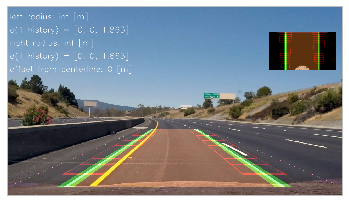

In [8]:
show(laneFinder.draw(frame));

In [9]:
[(x, x.isColor, x.isMono) for x in colorFilter.getMembersByType(cf.CvtColor)]

[(RGB to LAB., True, False),
 (RGB to HLS., True, False),
 (RGB to HLS., True, False)]

In [10]:
# from functools import wraps


# class Prop:
    
#     def __init__(self, implied=None, disimplied=None, **defaultNodeProperties):
#         self.implied = implied
#         self.disimplied = disimplied
#         self.defaultNodeProperties = defaultNodeProperties
        
#     def __call__(self, method):
#         propName = '_%s' % method.__name__
#         @property
#         def get(innerSelf):
#             return getattr(innerSelf, propName, False)
#         @get.setter
#         def get(innerSelf, setValue):
#             # Set the value itself.
#             print('Setting %s to %s.' % (propName, setValue))
#             setattr(innerSelf, propName, setValue)
#             # Set or unset the associated properties.
#             if setValue:
#                 innerSelf._traits[propName] = dict(**self.defaultNodeProperties)
#             else:
#                 innerSelf._traits.pop(propName, None)
                
#             if self.implied is not None:
#                 for imp in self.implied.split():
#                     if getattr(innerSelf, imp) != setValue:
#                         setattr(innerSelf, imp, setValue)
#             if self.disimplied is not None:
#                 for dimp in self.disimplied.split():
#                     if getattr(innerSelf, dimp) == setValue:
#                         setattr(innerSelf, dimp, not setValue)
#             setattr(innerSelf, propName, setValue)
            
#         return get


# class Op:
    
#     @property
#     def _traits(self):
#         k = '_Op__traits'
#         setattr(self, k, getattr(self, k, {}))
#         return getattr(self, k)
    
#     @property
#     def node_properties(self):
#         out = {}
#         for d in self._traits.values():
#             out.update(d)
#         return out

#     @Prop(disimplied='isColor', shape='box')
#     def isMono(self):
#         pass
    
#     @Prop(disimplied='isMono isBoolean', shape='box3d')
#     def isColor(self):
#         pass
    
#     @Prop(implied='isMono', style='dashed')
#     def isBoolean(self):
#         pass

# op = Op()
# print('mono=%s, color=%s, boolean=%s, props=%s' % (op.isMono, op.isColor, op.isBoolean, op.node_properties))
# op.isMono = True
# print('mono=%s, color=%s, boolean=%s, props=%s' % (op.isMono, op.isColor, op.isBoolean, op.node_properties))
# op.isMono = False
# print('mono=%s, color=%s, boolean=%s, props=%s' % (op.isMono, op.isColor, op.isBoolean, op.node_properties))
# op.isBoolean = True
# print('mono=%s, color=%s, boolean=%s, props=%s' % (op.isMono, op.isColor, op.isBoolean, op.node_properties))
# op.isColor = True
# print('mono=%s, color=%s, boolean=%s, props=%s' % (op.isMono, op.isColor, op.isBoolean, op.node_properties))

CPU times: user 2.7 s, sys: 32 ms, total: 2.73 s
Wall time: 2.67 s


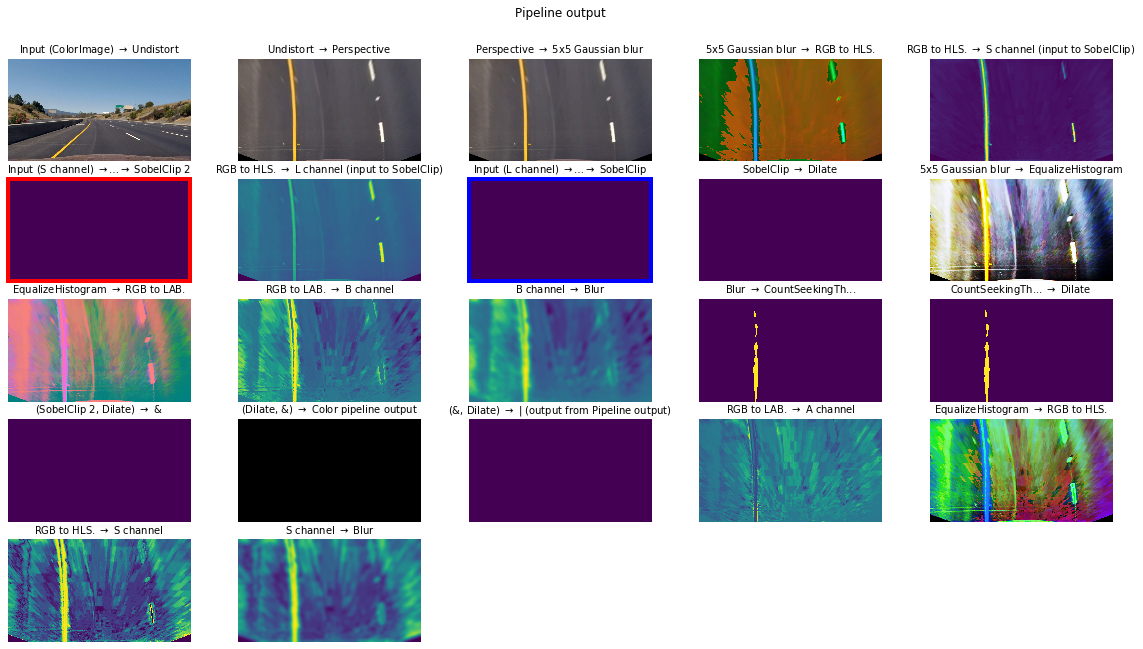

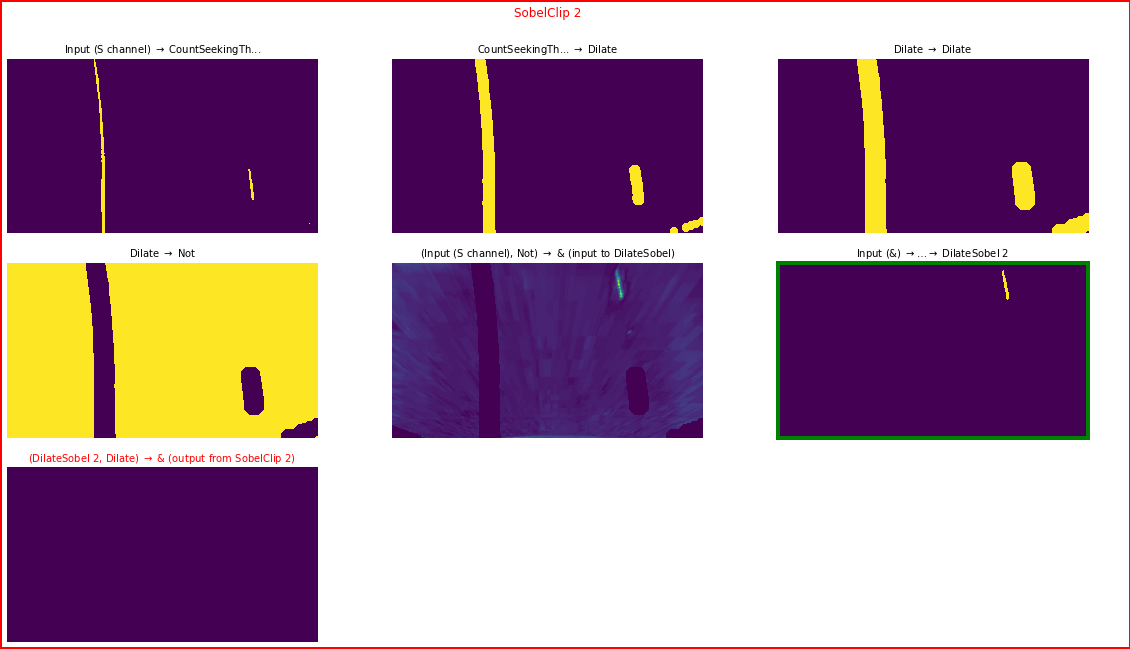

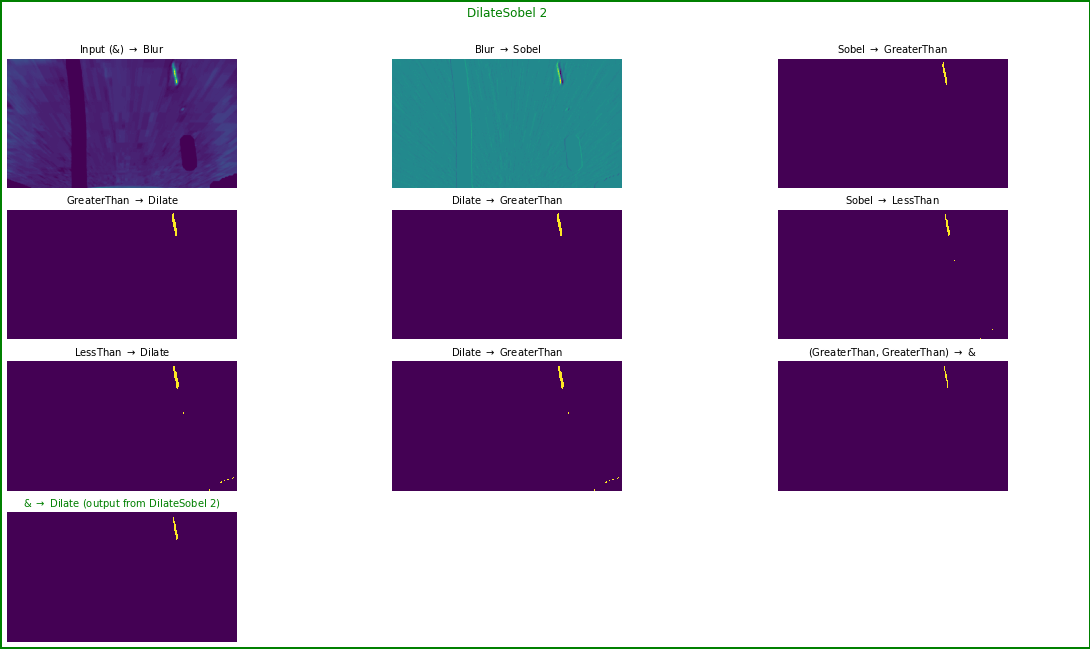

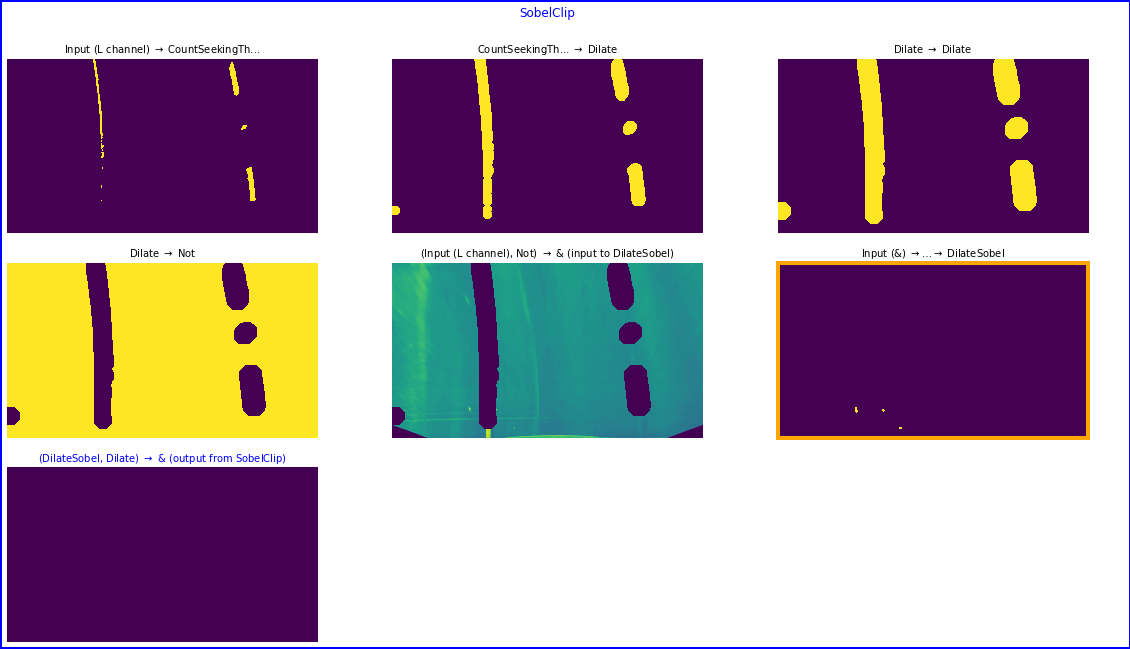

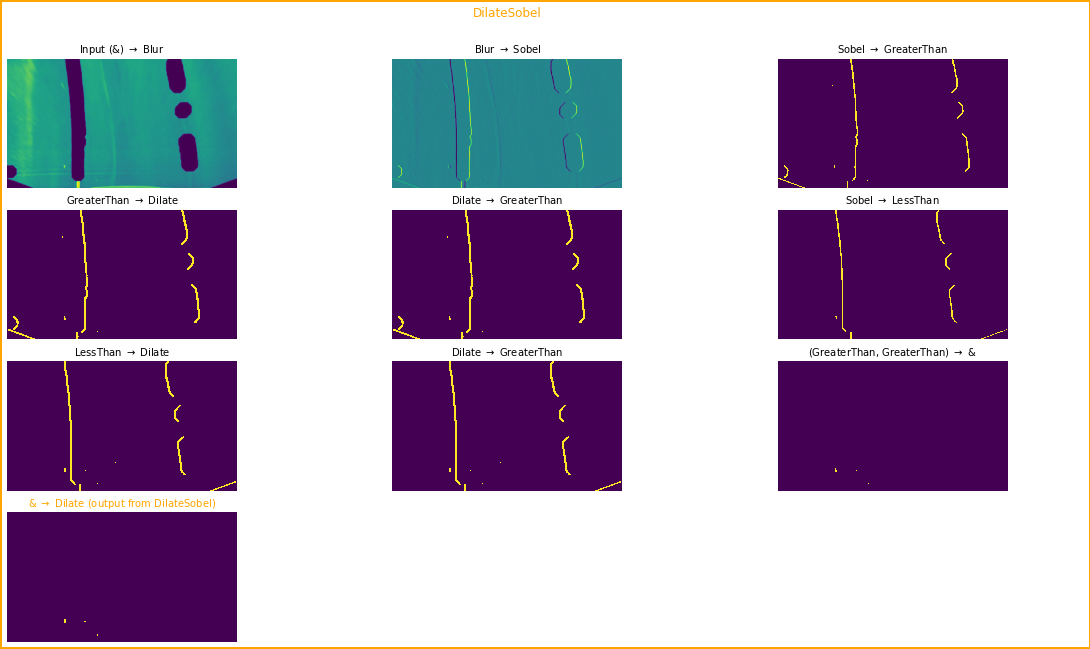

In [11]:
%%time
figs = colorFilter.showMembers(subplotKwargs=dict(figsize=(16,9)), wspace=0)
for ext in ('png',):
    for fig in figs:
        label = fig.texts[0].get_text()
        ok = 'abcdefghijklmnopqrstuvwxyz'
        ok += ok.upper() + '01234567890-'
        for ch in label:
            if ch not in ok:
                label.replace(ch, '_')


In [13]:
colorFilter.draw(savePath='/tmp/test', format='pdf');

Saved to /tmp/test.pdf.


In [18]:
colorFilter(frame).sum()

0

In [14]:
sc = colorFilter.getMembersByType(cf.SobelClip)[1]

In [15]:
sc.output.parent().getSimpleName()

'& (output from SobelClip)'

In [16]:
raise RuntimeError

RuntimeError: 

In [ ]:
import utils

Measure frames per second without plotting.

In [ ]:
%%time
import tqdm
for frame in tqdm.tqdm_notebook(allFrames['project'][:100], unit='frame'):
    laneFinder(frame)

In [ ]:
utils.transformVideo(allFrames['project'], 'cf-%s.mp4' % laneFinder.colorFilter, laneFinder.draw)